### Facial Emotion Recognition using YOLOv

In [1]:
%pip install torch torchvision
%pip install efficientnet_pytorch
%pip install opencv-python
%pip install matplotlib
%pip install seaborn
%pip install pandas
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=797a2956102f72c091ddbe6ac578f7ff82f32d34e7cf55585b8a2dbed9da4714
  Stored in directory: /Users/nixi/Library/Caches/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Create annotation files for each image to accompany the YOLO format. These include: Coordinates ounding boxed of each face in the classifcation dataset and Class label fr each face detected in the image.

-  Class ID 
- Centre x (cof bounding box)
- Centre Y (of bounding box)
- Width of bounding box normalised by the height of the image
-  Height of bounding box normalized by the width of the image


In [6]:
import os
import cv2

# Define paths
dataset_path = '/Users/nixi/Desktop/Final-thesis-folder-24/AI-for-Media-project-23-24/my-classification-dataset'
annotations_path = '/Users/nixi/Desktop/Final-thesis-folder-24/AI-for-Media-project-23-24/Yoloannotations'
os.makedirs(annotations_path, exist_ok=True)

# Initialize the face cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

# Create YOLO format annotations
def create_yolo_annotations():
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                image_path = os.path.join(root, file)
                annotation_path = os.path.join(annotations_path, file.replace('.jpg', '.txt').replace('.png', '.txt'))
                
                # Load image
                image = cv2.imread(image_path)
                height, width, _ = image.shape
                
                # Detect faces
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
                
                # Create annotation file
                with open(annotation_path, 'w') as f:
                    for (x, y, w, h) in faces:
                        # YOLO format: class_id center_x center_y width height (normalized)
                        center_x = (x + w / 2) / width
                        center_y = (y + h / 2) / height
                        norm_width = w / width
                        norm_height = h / height
                        f.write(f"0 {center_x} {center_y} {norm_width} {norm_height}\n")

create_yolo_annotations()

libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
libpng warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


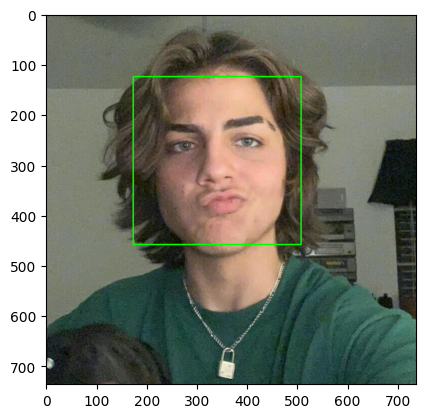

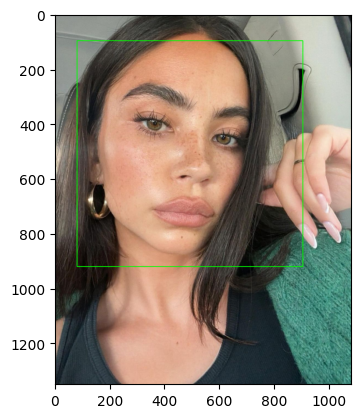

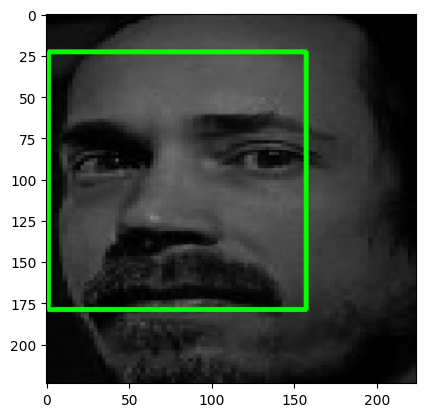

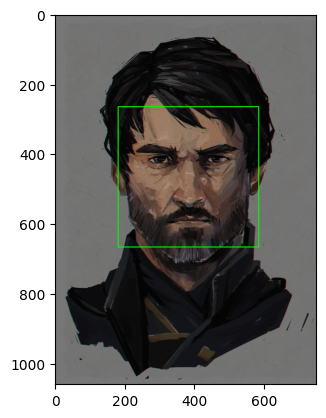

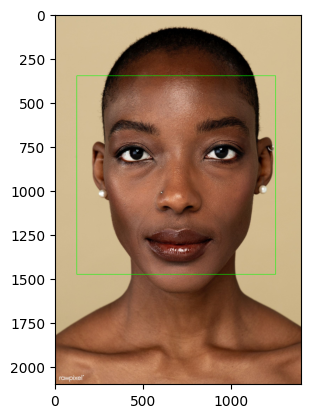

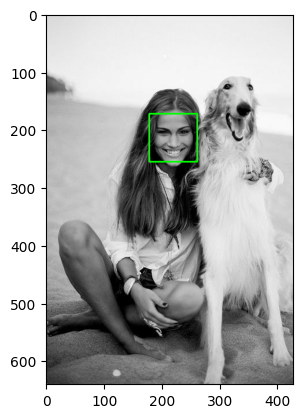

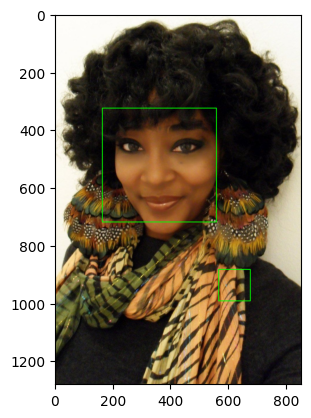

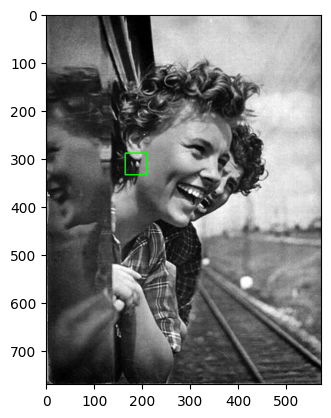

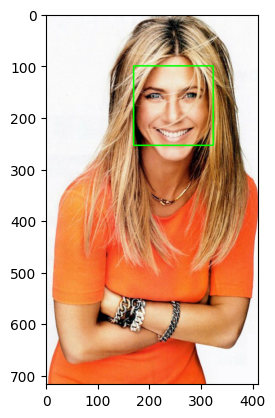

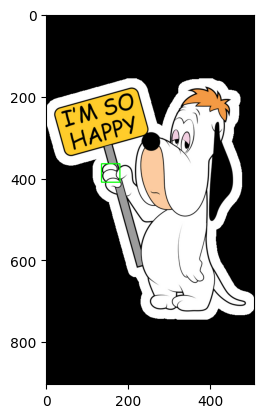

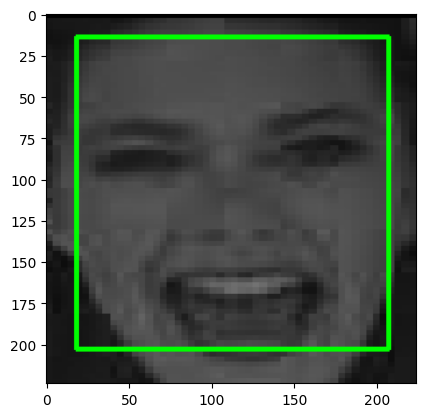

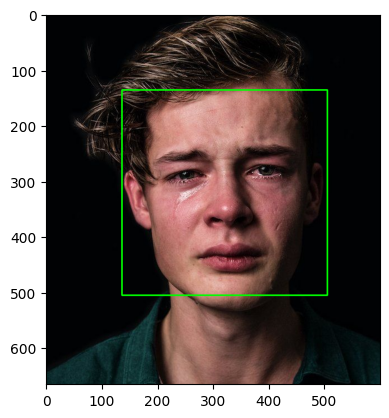

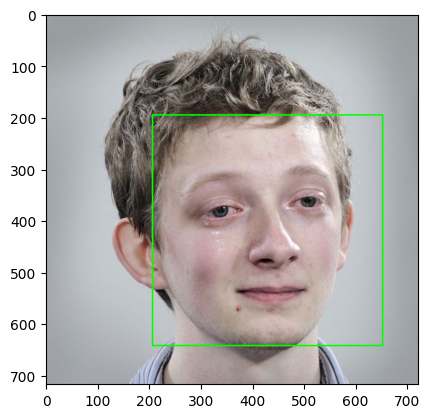

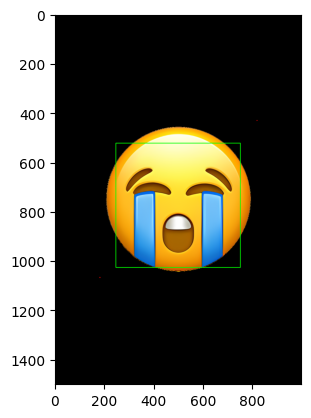

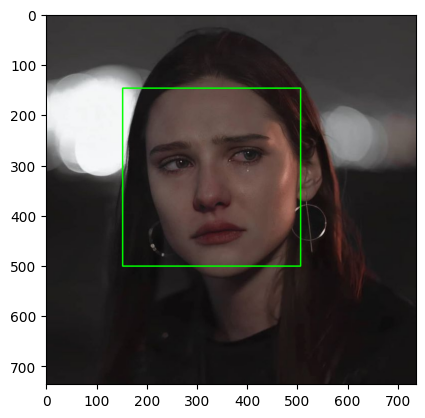

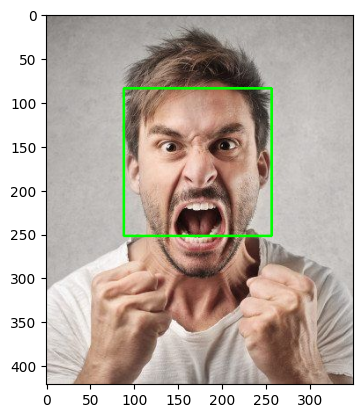

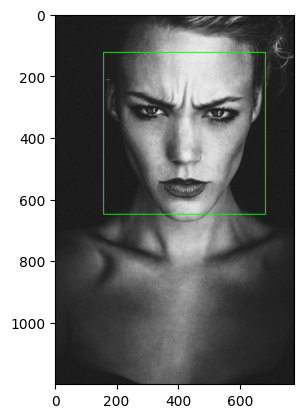

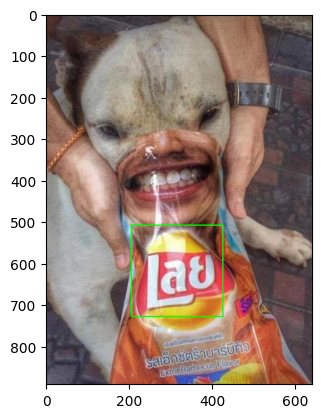

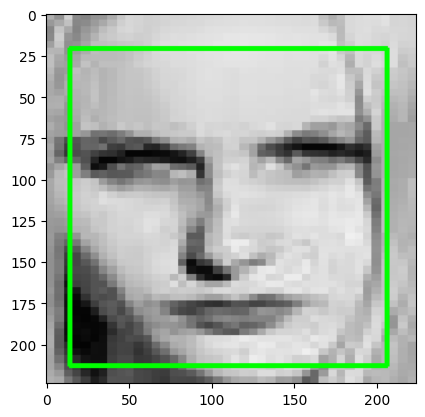

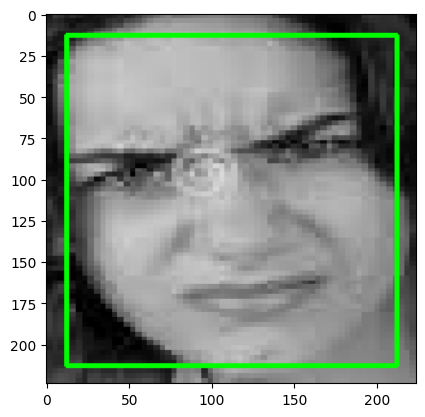

In [7]:
# Verify a random sample from each class ( sad, happy, neutral, angry) and verify images to annotation to check if this process has been successful and accurate in labelling faces present.
import random
import matplotlib.pyplot as plt

def visualize_annotations(image_path, annotation_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    
    with open(annotation_path, 'r') as f:
        for line in f:
            class_id, center_x, center_y, norm_width, norm_height = map(float, line.strip().split())
            x = int((center_x - norm_width / 2) * width)
            y = int((center_y - norm_height / 2) * height)
            w = int(norm_width * width)
            h = int(norm_height * height)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# Sample a few images from each class for verification
def sample_and_verify_annotations(dataset_path, annotations_path, sample_size=5):
    for class_dir in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_dir)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if f.endswith('.jpg') or f.endswith('.png')]
            sampled_images = random.sample(images, min(sample_size, len(images)))
            for image in sampled_images:
                image_path = os.path.join(class_path, image)
                annotation_path = os.path.join(annotations_path, image.replace('.jpg', '.txt').replace('.png', '.txt'))
                visualize_annotations(image_path, annotation_path)

# Example usage
sample_and_verify_annotations(dataset_path, annotations_path)

Organise 

In [ ]:
# Use the train and validation split from 'AI-for-Media-project-23-24/3-Emotion-classifier.ipynb' 